#### Programming Exercise 4: Neural Networks Learning

advantage of matrix representation: can easilty use them in vectorized algorithm
advantage of vector representation: need vector representation to use the built in optimizers    

In [8]:
#same dataset as before
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io 
import scipy.misc 
import matplotlib.cm as cm 
import random 
from scipy.special import expit as sigmoid
#sigmoid will be vectorized

In [16]:
#how to work with .mat files in python.
#training set of handwritten digits
data = 'ex4data1.mat'
mat = scipy.io.loadmat(data)

X, Y= mat['X'], mat['y']

#ideally i should import files instead of copy pasting them in.

data = 'ex4weights.mat'
mat = scipy.io.loadmat(data)

Theta1, Theta2= mat['Theta1'], mat['Theta2']

#### 1.1 Visualizing the data

Since i've already done the dislplay_data file in a previous notebook, this became an excercise in trying to import code from notebooks. http://nbviewer.jupyter.org/github/ipython/ipython/blob/master/examples/IPython%20Kernel/Importing%20Notebooks.ipynb

In [13]:
# %load -s display_data ../ex3_neural_networks/ex3_neural_networks
def display_data(X,Y,sample_rows=100):
    #sample rows has to be square

    width=20
    height=20

    row_dim=int(np.sqrt(sample_rows)*height)
    col_dim=row_dim

    matrix=np.zeros((row_dim,col_dim)).astype(float)

    random_index=random.sample(range(0,4000), sample_rows)

    row_i=0
    col_i=0
    for i in random_index:


        random_row=X[i][:]
        X_row_matrix=np.reshape(random_row,(20,20)).T

        matrix[ height*row_i : height*(row_i+1) , width*col_i : width*(col_i+1)]=X_row_matrix
        #the submatrix shape will be 20 by 20. and from a given row, it will go columnwise
        #(as opposed to the converse, namely that for a given column, go row-wise)
        #there probably exists a name for this but i dont know it. drawing pictures help.
        #for this submatrix (that is populated by zeros), assign it the X_row_matrix

        col_i+=1
        #for the given row_i, increment col_i

        if col_i==matrix.shape[1]/height:
            #i,e we have looped through col_i until the end of the col_dim

            row_i+=1
            col_i=0
            #then we want to reset the col index and start on a new row

            #we do not need the same kind of reset-mechanism on row_i since random_index, by construction, has just the correct length

    return matrix


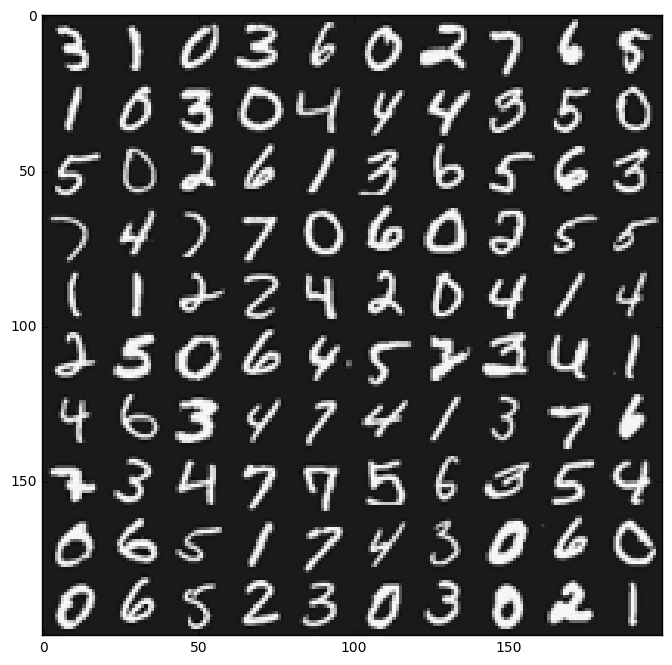

In [15]:
tst_matrix=display_data(X,Y)
fig = plt.figure(figsize=(8,8))
img_matrix=scipy.misc.toimage(tst_matrix)
plt.imshow(img_matrix,cmap=plt.cm.Greys_r, interpolation='none')
plt.show()

In [20]:
#create cost function
#in order to do it need to transform the y's
#start by putting 1's in X

In [45]:
#have to assign 1's column to X and make sure they are holding floats(to make the matrix operations work smoothly)
X=np.insert(X, 0, 1, axis=1)
X=X.astype(float)
Y=Y.astype(float)

In [46]:

def g(y_label):

    def f(y):

        if y==y_label:
            return 1
        else:
            return 0
        
    return f    

In [47]:
def label_generator(Y, K=10, tol=1):
    Y_len=len(Y)
    labels=list(range(1,K+1))
    #1-10 incl
    
    #in some other circumstance the labels should be retrived from  the Y array
    Y_matrix=np.zeros((10,Y_len))
    
    
    for label in labels:
        Y_labeled=np.array(list(map(g(label), Y)))
         
        Y_matrix[label-1]=Y_labeled
    
    return Y_matrix

In [48]:
Y_matrix=label_generator(Y)

In [39]:
#Y_matrix's rows are filled with the booleans. row0 is label 1....row9 is label10 (which is 0)

In [50]:
Theta1.shape

(25, 401)

In [184]:
def h_theta(X,Theta1, Theta2, give_all_matrices=False):
    
    #biasterm has already been added in X.T
    a_1_matrix=X.T
    
    z_2_matrix=np.dot(Theta1,a_1_matrix)
    #should be a 25X5000 matrix
    a_2_matrix=sigmoid(z_2_matrix)
    
    
    #interp: the zeroth element in that row represent a scalar, z2 after the transformation of one vector.
    #it is a row, beause i will do it such that the input layer is the entire X, and not X[i]
    
    a_2_matrix=np.insert(a_2_matrix,0,1,axis=0)
    # need to add a bias term
    
  
    
    z_3_matrix=np.dot(Theta2,a_2_matrix)
    
    a_3_matrix=sigmoid(z_3_matrix)
    #shape of this thing will be 10x5000.
    
    h_theta_matrix=a_3_matrix
    
    if give_all_matrices==False:
        return h_theta_matrix
    else:
        return a_1_matrix,a_2_matrix,a_3_matrix, z_2_matrix, z_3_matrix

In [101]:
def cost_function_nn(Y_matrix,X,Theta1,Theta2, l=0):
    
    K=len(Y_matrix)
    M=len(X)
    
    h_theta_matrix=h_theta(X, Theta1, Theta2)
    #h_theta_matrix shape 10x5000
    
    total_cost=[]
    
    for k in range(K):
        h_theta_row=h_theta_matrix[k]
        #h theta row will be a vector with length M(i,e all observations), where i have computed h_theta by feed forward.
        Y_k=Y_matrix[k]
        #Y_k will be a  vector with length M (5000)   filled with 1's instead of k and filled with 0 otherwise
            
         
        term1=-np.dot(Y_k.T,np.log(h_theta_row))
        term2=np.dot((1-Y_k).T,np.log(1-h_theta_row))
            
        class_cost=(term1-term2)/M
        total_cost.append(class_cost)
     
    #Note that you should not be regularizing the terms that correspond to the bias.
    
        #Theta1[:,1:]
        #Theta2[:,1:]
        reg_term=(sum(sum(Theta1[:,1:]**2))+sum(sum(Theta2[:,1:]**2)))*l/(2*M)
    
    return sum(total_cost) +reg_term

In [102]:
cost_function_nn(Y_matrix,X,Theta1,Theta2, l=0)
    
    

0.28762916516131892

"You should see that the cost is about 0.287629."-pdf. Satisfaction. Was a challenging abstraction to make. I like matrix notation way more than sums everywhere, I think it gives a better overview.

In [103]:
cost_function_nn(Y_matrix,X,Theta1,Theta2, l=1)

0.38376985909092365

"You should see that the cost is about 0.383770."-pdf

### 2 Backpropagation

In [186]:


def sigmoid_gradient(x):
    
    return sigmoid(x)*(1-sigmoid(x))

In [187]:
sigmoid_gradient(Y_matrix).shape==Y_matrix.shape

True

#### 2.2 Random initialization

In [188]:
def nn_random_theta_init(shape, interval=0.12):
    #enter shape as tuple
    dim=shape[0]*shape[1]
    
    
    interval=np.linspace(-interval,interval,dim)
    #generate all neccessary elements
    
    random_interval=np.random.shuffle(interval)
    #shuffle them
    
    #import pdb; pdb.set_trace()

    
    matrix=np.reshape(interval, shape)
    
    return matrix    
        
    

In [189]:
Theta1_random=nn_random_theta_init(Theta1.shape)

In [190]:
Theta2_random=nn_random_theta_init(Theta2.shape)

In [191]:
Theta1_random.shape==Theta1.shape

True

#### 2.3 Backpropagation

In [192]:
#idea: compute the 'deltas'. by a result, we can easily get the partial derivatives from this.


def back_propagation(X,Theta1_random, Theta2_random, Y_matrix):
    
    ##############essentially same code as in h_theta
    
    #z_2_matrix=np.dot(Theta1_random,X.T)
    #should be a 25X5000 matrix
    #a_2_matrix=sigmoid(z_2_matrix)
    
    
    #interp: the zeroth element in that row represent a scalar, z2 after the transformation of one vector.
    #it is a row, beause i will do it such that the input layer is the entire X, and not X[i]
    
    #a_2_matrix=np.insert(a_2_matrix,0,1,axis=0)
    # need to add a bias term
    
  
    
    #z_3_matrix=np.dot(Theta2_random,a_2_matrix)
    
    #a_3_matrix=sigmoid(z_3_matrix)
    #shape of this thing will be 10x5000.
    # row 0 will consist of the costs from the 5000 observations, when they where counted from the zero class (label 1)
    
    ##############
    #recall Y_matrix
    #Y_matrix's rows are filled with the booleans. row0 is label 1....row9 is label10 (which is 0)
    
    a_1_matrix,a_2_matrix,a_3_matrix, z_2_matrix, z_3_matrix=h_theta(X,Theta1_random, Theta2_random, give_all_matrices=True)

    
    d_3_matrix=a_3_matrix-Y_matrix #10x5000
    
    
    #need to remove delta_0
    term=np.dot(Theta2_random.T,d_3_matrix)
    ##26*5000
    term=term[1:]
    #25x5000
    
    d_2_matrix=term*sigmoid_gradient(z_2_matrix)
    
    
    return d_2_matrix,d_3_matrix,a_1_matrix,a_2_matrix
    



In [193]:
#with some random thetas,give me some small d vectors

In [194]:
#d_2_matrix,d_3_matrix,a_2_matrix, a_3_matrix=back_propagation(X,Theta1_random,Theta2_random,Y_matrix)   

In [172]:
D_1_matrix=np.zeros((25,25))
D_2_matrix=np.zeros((10,10))
#initalize zeors for big D matrixes

In [175]:
#update matrixes
D_1_matrix=(D_1_matrix+np.dot(d_2_matrix,a_2_matrix[1:].T))/5000   
#D_3_matrix

D_2_matrix=(D_2_matrix+np.dot(d_3_matrix,a_3_matrix.T))/5000
#i guess now that each row, or column now corresponds to a gradient, so the whole think is a jacobian of sorts

In [179]:
def gradient_collector(X,Theta1_random,Theta2_random,Y_matrix, D_1_matrix=None,D_2_matrix=None):
    
    d_2_matrix,d_3_matrix,a_1_matrix,a_2_matrix=back_propagation(X,Theta1_random,Theta2_random,Y_matrix) 
    #back_propagation function calls h_theta, which takes the entire X and front-propagates
    #from the information from fron propagates, it computes the d_2 and d_3 -matrices that are neccessary for collecting
    #the gradient
    
    #gradient_collector corresponds to step 4 in backprop from the pdf.
    
    D_1_term=np.dot(d_2_matrix,a_1_matrix.T)
    D_2_term=np.dot(d_3_matrix,a_2_matrix.T)
    
    if D_1_matrix==None and D_2_matrix==None:
        #if they are not initalized, initalize em'!
        
        D_1_matrix=np.zeros(D_1_term.shape)
        D_2_matrix=np.zeros(D_2_term.shape)
        #should be 25x401 and 10x26 respectivly
        
        #they correspond to to shapes of Theta1,Theta2, respectivly!
        
    #update
    
    D_1_matrix=D_1_matrix + D_1_term
    D_2_matrix=D_2_matrix + D_2_term
        

    #probably need to return them unrolled into one huge vector, and devide my 
    
    #To perform gradient checking on your parameters, you can imagine “unrolling” the parameters Θ(1), Θ(2) into a long vector θ
    #this will be the pattern
    
    #D_1_matrix_flatten=D_1_matrix.flatten('C')
    #'C' flattens row-wise, i,e preserves the rows, whereas 'F' flattens column-wise,
    
    return D_1_matrix,D_2_matrix
    
    

(25, 25)

In [180]:
def gradient_nn(X,Theta1_random,Theta2_random,Y_matrix, D_1_matrix=None,D_2_matrix=None):
    
    D_1_matrix,D_2_matrix=gradient_collector(X,Theta1_random,Theta2_random,Y_matrix, D_1_matrix=None,D_2_matrix=None)
    
    
    
    

(10, 10)

In [162]:
a_3_matrix.shape

(10, 5000)

In [167]:
d_3_matrix.shape

(10, 5000)